In [1]:
from ClipEmbeddingsGenerator import ClipEmbeddingsGenerator, draw_images
import pymilvus 
import glob


## Setup

In [73]:
model = ClipEmbeddingsGenerator()
paths = glob.glob('./avatars/*.png')
embedded_images = model.embedd_images(paths)

data = [{'id': int(path.split('\\')[-1].split('.')[0].replace('-', '')), 'image_path': path, 'embedding': embedding} for path, embedding in zip(paths, embedded_images)]


{'id': 468694721,
 'image_path': './avatars\\00000-468694721.png',
 'embedding': array([-1.64384231e-01,  3.04856002e-01, -2.33877331e-01,  1.20763198e-01,
        -2.45107934e-01, -3.99338007e-01,  2.05165260e-02,  3.77293043e-02,
         9.08116549e-02,  1.05804160e-01,  2.88652748e-01,  8.45319182e-02,
         1.60961181e-01, -7.80648738e-02,  3.57010901e-01, -2.08874166e-01,
         9.18522716e-01, -3.69505674e-01, -2.75411308e-01,  1.66655704e-01,
        -3.09530139e-01, -8.40632617e-02, -2.93829888e-01,  1.39204770e-01,
        -4.04143214e-01,  2.32457548e-01,  2.11099997e-01,  6.87459856e-02,
        -6.70807287e-02,  2.59161204e-01, -3.88904095e-01,  2.34270722e-01,
        -8.10549557e-02, -1.12583920e-01,  2.20697761e-01,  3.83435965e-01,
        -5.39256185e-02,  6.25973046e-01,  1.37864172e-01,  3.83311838e-01,
         3.77902865e-01,  3.84218901e-01,  1.54264614e-01, -1.69353858e-01,
         3.13643873e-01,  1.44338226e+00, -1.03776598e+00,  1.12195611e-02,
        

In [60]:
from pymilvus import connections, db

conn = connections.connect(host="localhost", port=19530, database='dungeons')

In [2]:
from pymilvus import MilvusClient

client = MilvusClient(host="localhost", port=19530, database='dungeons')


In [82]:
# 3. Create a collection in customized setup mode

# 3.1. Create schema
schema = MilvusClient.create_schema(
    auto_id=False,
    enable_dynamic_field=True,
)

schema.add_field(field_name="id", datatype=pymilvus.DataType.INT64, is_primary=True)
schema.add_field(field_name="image_path", datatype=pymilvus.DataType.VARCHAR, max_length=256)
schema.add_field(field_name="embedding", datatype=pymilvus.DataType.FLOAT_VECTOR, dim=512)



{'auto_id': False, 'description': '', 'fields': [{'name': 'id', 'description': '', 'type': <DataType.INT64: 5>, 'is_primary': True, 'auto_id': False}, {'name': 'image_path', 'description': '', 'type': <DataType.VARCHAR: 21>, 'params': {'max_length': 256}}, {'name': 'embedding', 'description': '', 'type': <DataType.FLOAT_VECTOR: 101>, 'params': {'dim': 512}}], 'enable_dynamic_field': True}

In [83]:
# 3.3. Prepare index parameters
index_params = client.prepare_index_params()

# 3.4. Add indexes
index_params.add_index(
    field_name="id",
    index_type="STL_SORT"
)

index_params.add_index(
    field_name="embedding", 
    index_type="IVF_FLAT",
    metric_type="COSINE",
    params={ "nlist": 128 }
)

In [84]:
import time

client.create_collection(
    collection_name="avatars",
    schema=schema,
    index_params=index_params
)

time.sleep(5)

res = client.get_load_state(
    collection_name="avatars"
)

print(res)

{'state': <LoadState: Loaded>}


In [3]:
from pprint import pprint
res = client.describe_collection(
    collection_name="avatars"
)

pprint(res)

{'aliases': [],
 'auto_id': False,
 'collection_id': 448982854545350067,
 'collection_name': 'avatars',
 'consistency_level': 2,
 'description': '',
 'enable_dynamic_field': True,
 'fields': [{'description': '',
             'field_id': 100,
             'is_primary': True,
             'name': 'id',
             'params': {},
             'type': <DataType.INT64: 5>},
            {'description': '',
             'field_id': 101,
             'name': 'image_path',
             'params': {'max_length': 256},
             'type': <DataType.VARCHAR: 21>},
            {'description': '',
             'field_id': 102,
             'name': 'embedding',
             'params': {'dim': 512},
             'type': <DataType.FLOAT_VECTOR: 101>}],
 'num_partitions': 1,
 'num_shards': 1,
 'properties': {}}


In [87]:
data

[{'id': 468694721,
  'image_path': './avatars\\00000-468694721.png',
  'embedding': array([-1.64384231e-01,  3.04856002e-01, -2.33877331e-01,  1.20763198e-01,
         -2.45107934e-01, -3.99338007e-01,  2.05165260e-02,  3.77293043e-02,
          9.08116549e-02,  1.05804160e-01,  2.88652748e-01,  8.45319182e-02,
          1.60961181e-01, -7.80648738e-02,  3.57010901e-01, -2.08874166e-01,
          9.18522716e-01, -3.69505674e-01, -2.75411308e-01,  1.66655704e-01,
         -3.09530139e-01, -8.40632617e-02, -2.93829888e-01,  1.39204770e-01,
         -4.04143214e-01,  2.32457548e-01,  2.11099997e-01,  6.87459856e-02,
         -6.70807287e-02,  2.59161204e-01, -3.88904095e-01,  2.34270722e-01,
         -8.10549557e-02, -1.12583920e-01,  2.20697761e-01,  3.83435965e-01,
         -5.39256185e-02,  6.25973046e-01,  1.37864172e-01,  3.83311838e-01,
          3.77902865e-01,  3.84218901e-01,  1.54264614e-01, -1.69353858e-01,
          3.13643873e-01,  1.44338226e+00, -1.03776598e+00,  1.12195611

In [88]:
res = client.insert(
    collection_name="avatars",
    data=data
)

In [92]:
res = client.search(
    collection_name="avatars", # Replace with the actual name of your collection
    # Replace with your query vector
    data=[embedded_images[0]],
    limit=5, # Max. number of search results to return
    search_params={"metric_type": "COSINE", "params": {}}, # Search parameters
    output_fields=["image_path"] 
)

pprint(res)

[[{'distance': 0.9999997019767761,
   'entity': {'image_path': './avatars\\00000-468694721.png'},
   'id': 468694721},
  {'distance': 0.8881928324699402,
   'entity': {'image_path': './avatars\\00008-1945072424.png'},
   'id': 81945072424},
  {'distance': 0.8693963289260864,
   'entity': {'image_path': './avatars\\00034-2395602461.png'},
   'id': 342395602461},
  {'distance': 0.8586881756782532,
   'entity': {'image_path': './avatars\\00016-1300628933.png'},
   'id': 161300628933},
  {'distance': 0.8583647608757019,
   'entity': {'image_path': './avatars\\00100-802584388.png'},
   'id': 100802584388}]]


## Queries

In [ ]:
from pymilvus import MilvusClient

client = MilvusClient(host="localhost", port=19530, database='dungeons')

In [41]:
model_for_query = ClipEmbeddingsGenerator()

text = 'A man with white hair, blue eyes, young and handsome'
image_path = './keanu.jpg'
#embedded_vector = model_for_query.embedd_images([image_path])
embedded_vector = model_for_query.embedd_texts([text])

#draw_images([image_path], ['original photo'])

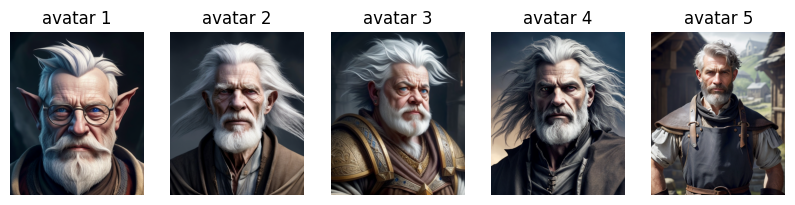

In [42]:
limit = 5

res = client.search(
    collection_name="avatars", # Replace with the actual name of your collection
    # Replace with your query vector
    data=embedded_vector,
    limit=limit, # Max. number of search results to return
    search_params={"metric_type": "COSINE", "params": {}}, # Search parameters
    output_fields=["image_path"] 
)

draw_images([res[0][i]['entity']['image_path'] for i in range(limit)], [f'avatar {i+1}' for i in range(limit)])